In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import sklearn.calibration
import numpy as np
import pickle

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
clf = pickle.load(open('../pipe2.pkl', 'rb'))

#Feature importances

([<matplotlib.axis.YTick at 0x7fb6fd012b70>,
 <a list of 10 Text yticklabel objects>)

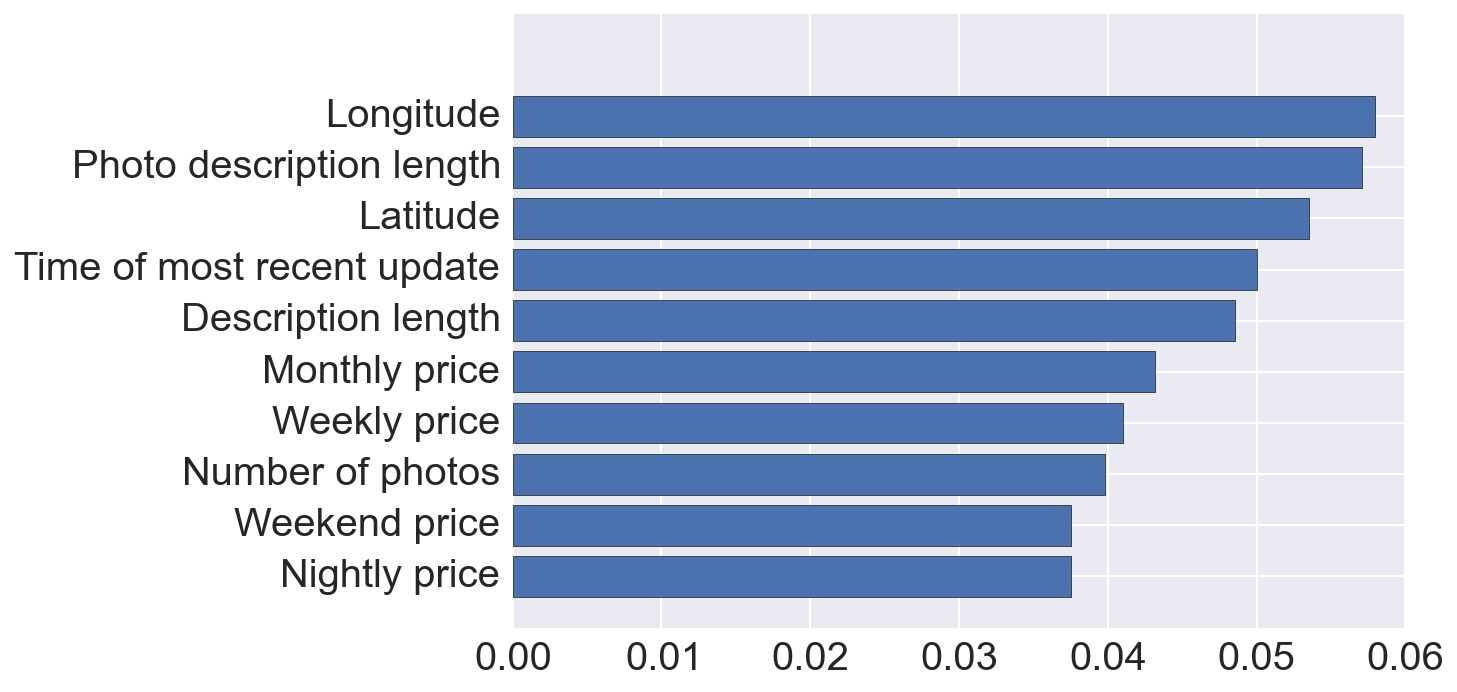

In [7]:
sns.set_context('notebook', font_scale=2)
importance = clf.base_estimator.named_steps['clf'].feature_importances_
ind = importance.argsort()[::-1]  # reverse order
n_features_plot = 10
names = ['Longitude', 'Photo description length', 'Latitude', 'Time of most recent update', 
         'Description length', 'Monthly price', 'Weekly price', 'Number of photos',
        'Weekend price', 'Nightly price']
yvals = range(n_features_plot, 0, -1)
plt.barh(yvals, importance[ind][:n_features_plot], align='center')
plt.yticks(yvals, names)

In [3]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating5)

#What is the importance of update time?

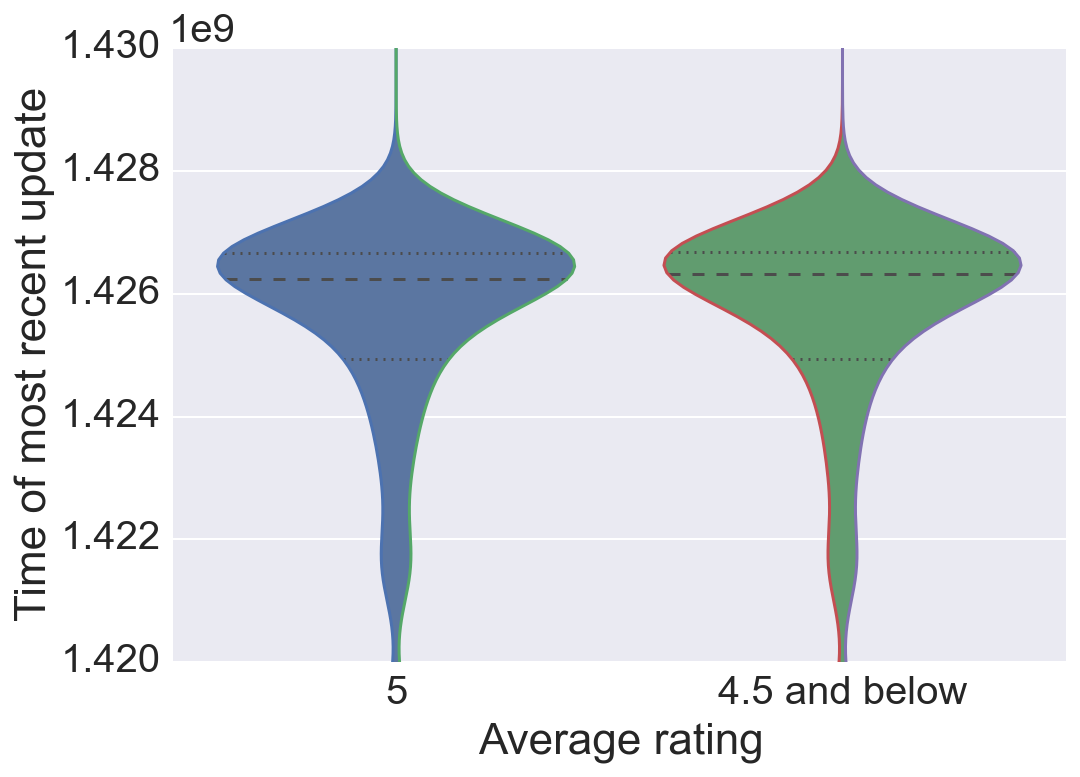

In [76]:
sns.violinplot(Xtr.lastUpdatedAt, groupby=ytr, cut=20, names=['5', '4.5 and below'], gridsize=1000)
plt.ylim(np.array([1.42, 1.43])*1e9)
plt.xlabel('Average rating')
plt.ylabel('Time of most recent update')

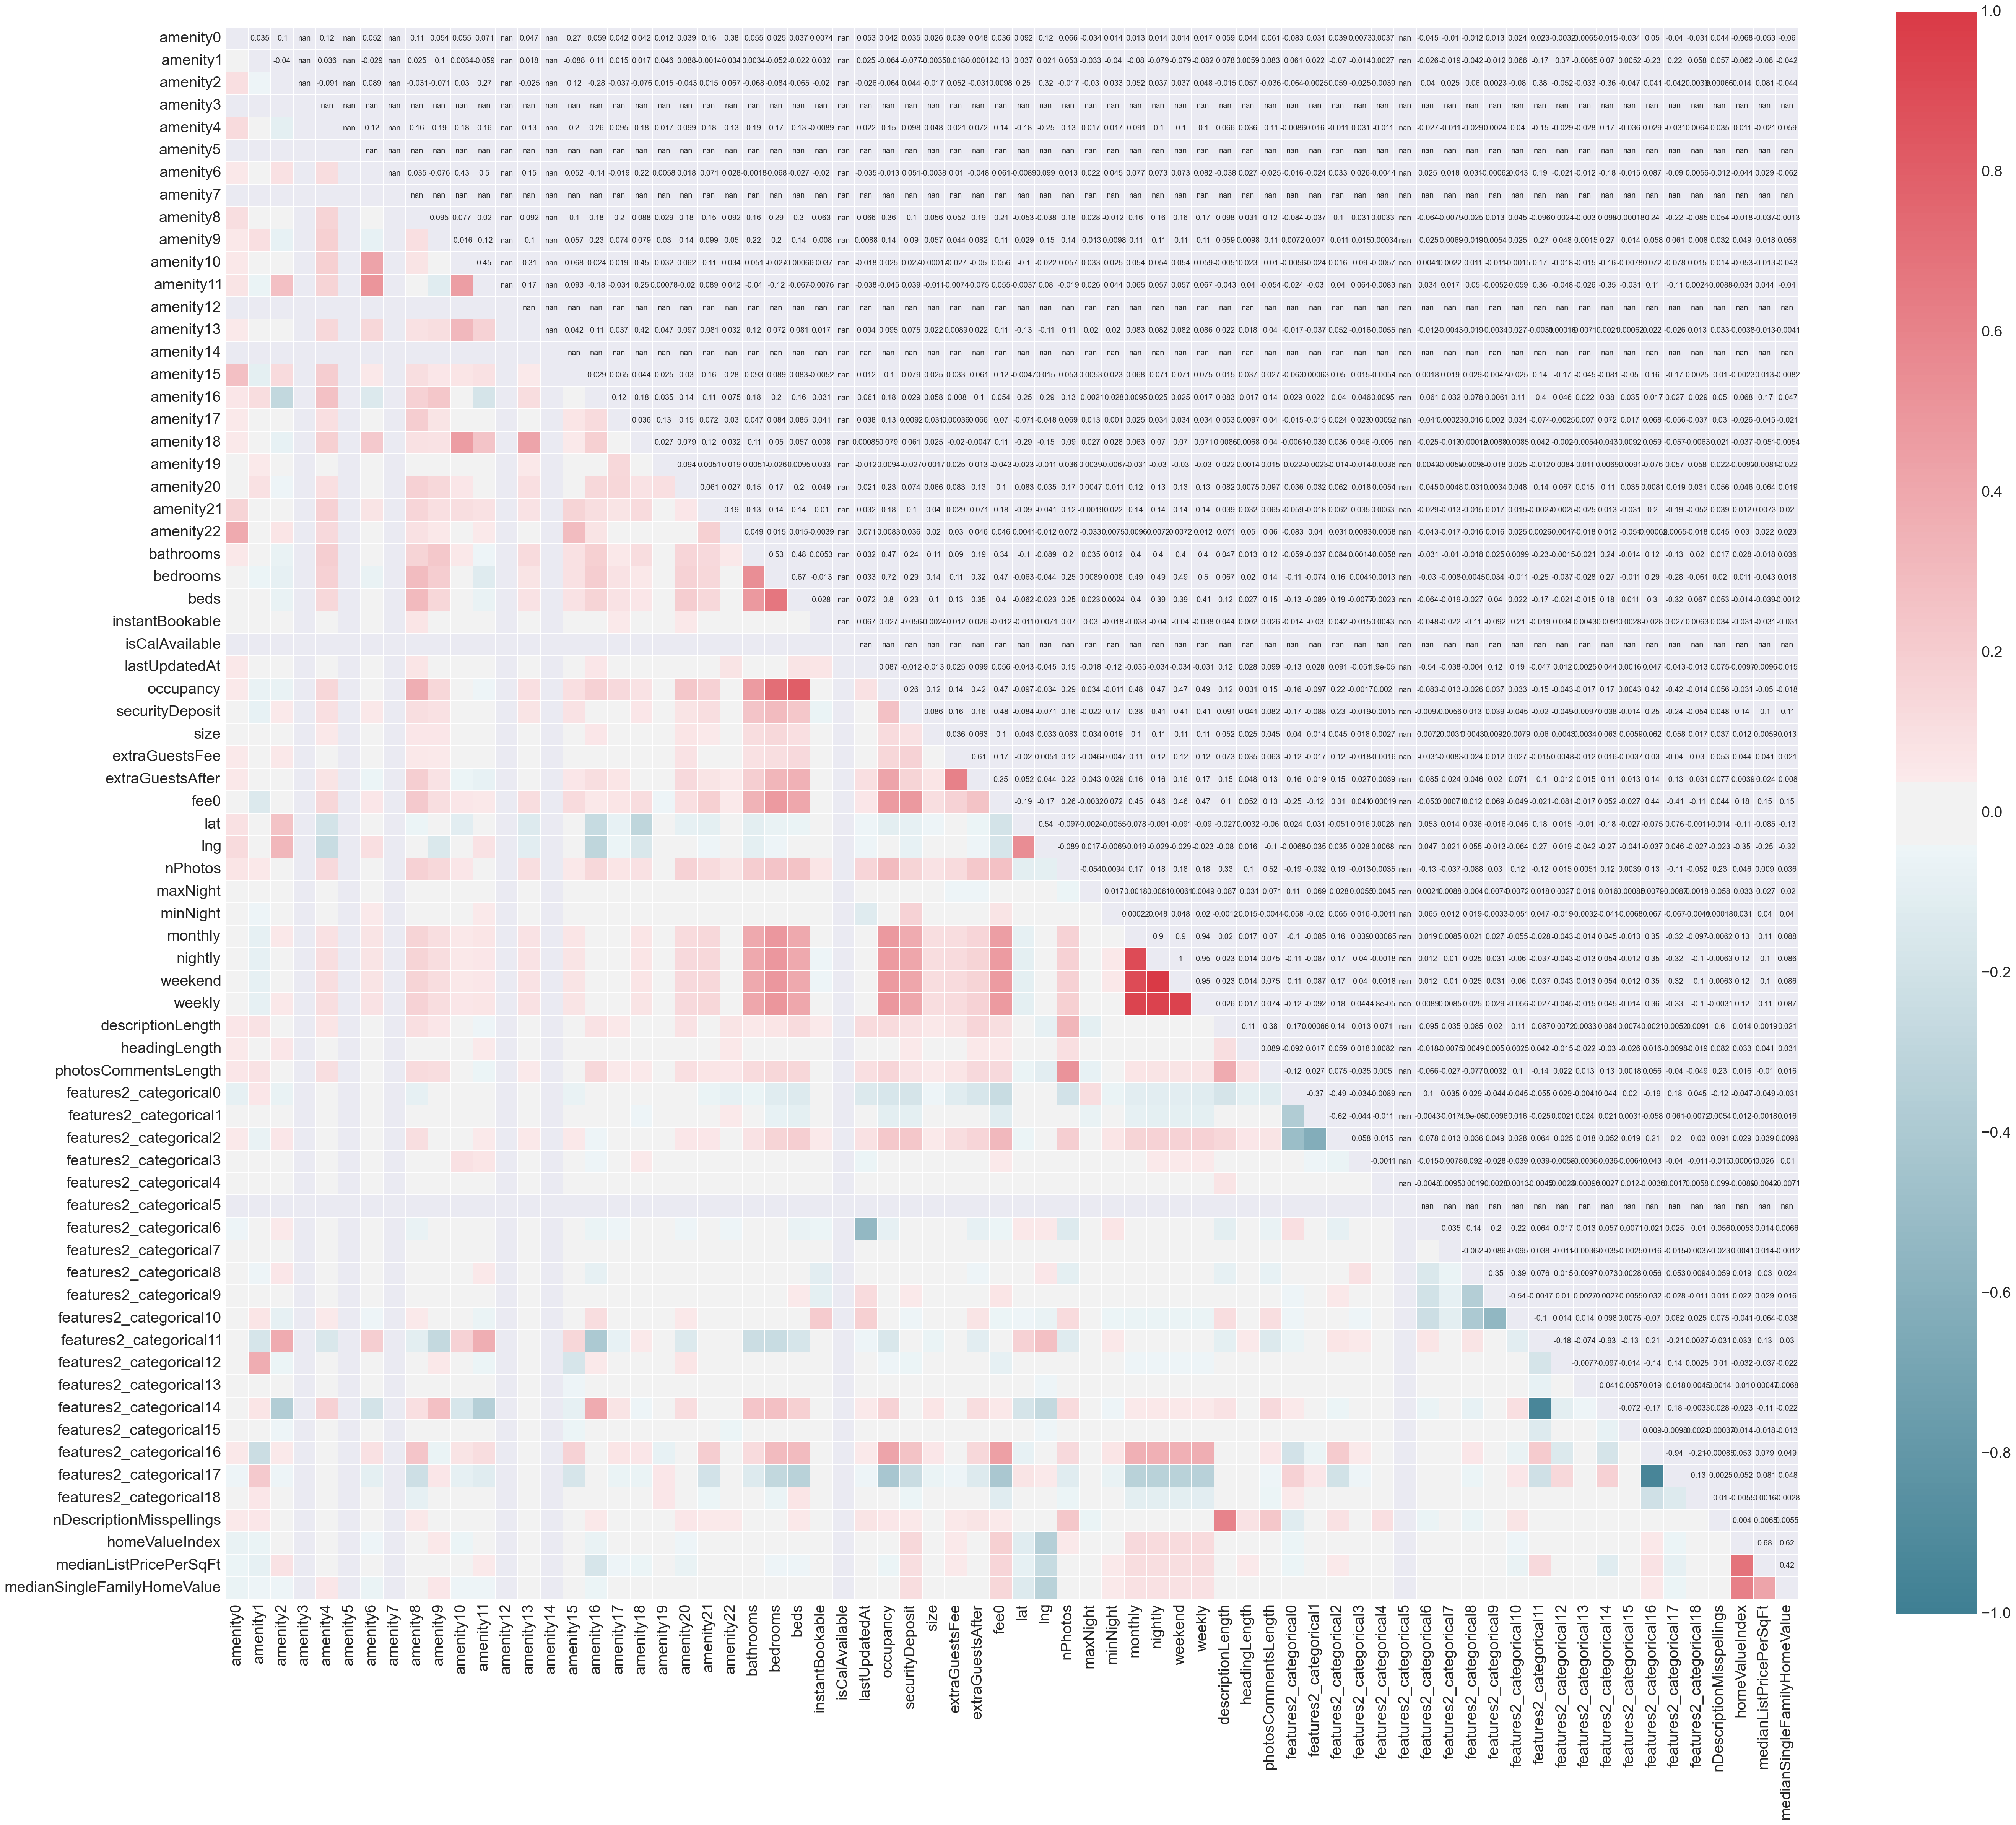

In [27]:
f, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(Xtr.drop(['amenity' + str(i) for i in range(23, 50)], axis=1), annot=True, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

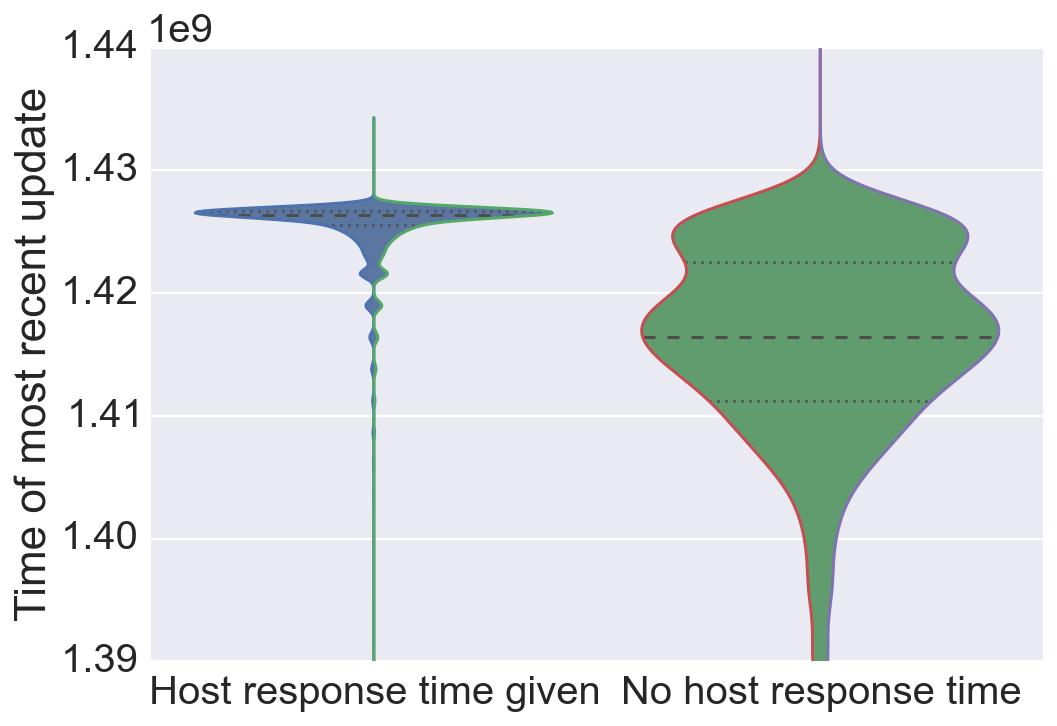

In [83]:
sns.violinplot(Xtr.lastUpdatedAt, groupby=Xtr.features2_categorical6, cut=20, gridsize=1000, 
               names=('Host response time given', 'No host response time',))
plt.ylim(np.array([1.39, 1.44])*1e9)
plt.xlabel('')
plt.ylabel('Time of most recent update')

#No host response time means lower ratings

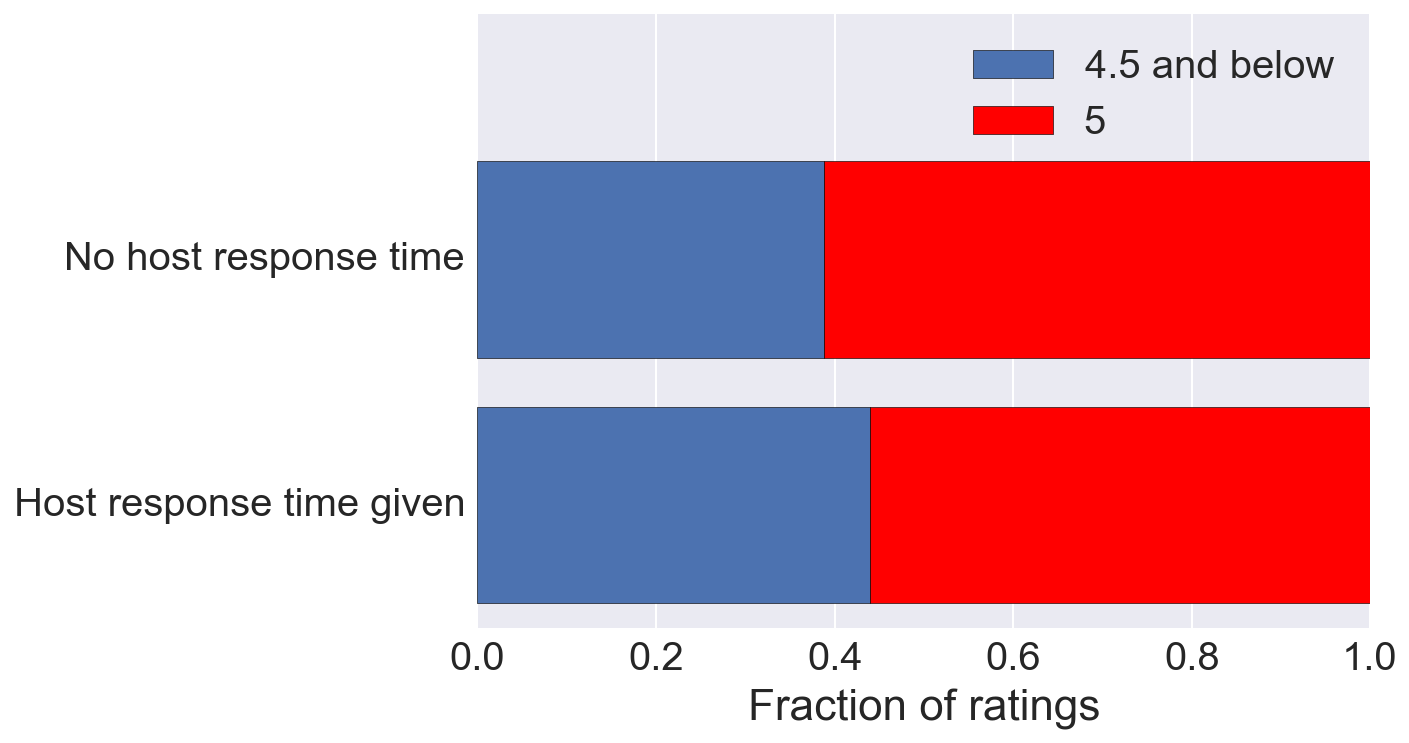

In [86]:
counts = ytr.groupby(Xtr.features2_categorical6).value_counts()
total_counts = counts.unstack(level=0).sum()
fractions = counts/total_counts
xs = range(2)
width = 0.8
plt.barh(xs, fractions.loc[:, '4.75-'], label='4.5 and below', height=width, align='center')
plt.barh(xs, fractions.loc[:, '4.75+'], left=fractions.loc[:, '4.75-'], label='5', color='red', 
         height=width, align='center')
plt.legend()
plt.yticks(xs, ('Host response time given', 'No host response time'), )
plt.ylim([-0.5, 2])
plt.xlabel('Fraction of ratings')

In [64]:
fractions.loc[:, '4.75+']

features2_categorical6
0    0.560719
1    0.612181
dtype: float64

In [36]:
17450/ 22274

0.7834246206339229

In [37]:
1248/1970

0.6335025380710659

In [41]:
np.sqrt(.63*(1-.63))/np.sqrt(1248)

0.013666705753540103

In [97]:
rawtable.rating

id
air100002     4.5
air1000083    4.5
air1000186    4.5
air1000199    4.7
air1000202    5.0
air1000264    4.5
air100042     5.0
air1000522    5.0
air100074     4.0
air1000755    4.5
air1000871    3.5
air100097     5.0
air1000995    NaN
air1000998    5.0
air1001065    4.5
air1001139    4.5
air1001145    4.5
air1001147    5.0
air1001160    5.0
air1001265    4.5
air1001273    4.0
air1001294    4.5
air1001353    5.0
air1001367    5.0
air1001405    4.0
air100142     4.5
air1001447    5.0
air1001469    5.0
air1001534    5.0
air1001567    5.0
             ... 
air9985       4.5
air998663     5.0
air99869      5.0
air998701     5.0
air998708     4.5
air998739     NaN
air998741     4.5
air998782     4.5
air998810     5.0
air998821     5.0
air998843     5.0
air998887     5.0
air998896     NaN
air998899     5.0
air998937     4.5
air999045     4.5
air999068     5.0
air999086     5.0
air99913      3.0
air999248     5.0
air999289     4.0
air999297     5.0
air999308     5.0
air999363     4.5
air9993

In [4]:
def include_unrated(rating):
    if not np.isfinite(rating):
        return 'Unrated'
    else:
        return rating

In [17]:
pd.DataFrame.fillna

NaT

([<matplotlib.axis.XTick at 0x7fae85839048>,
 <a list of 8 Text xticklabel objects>)

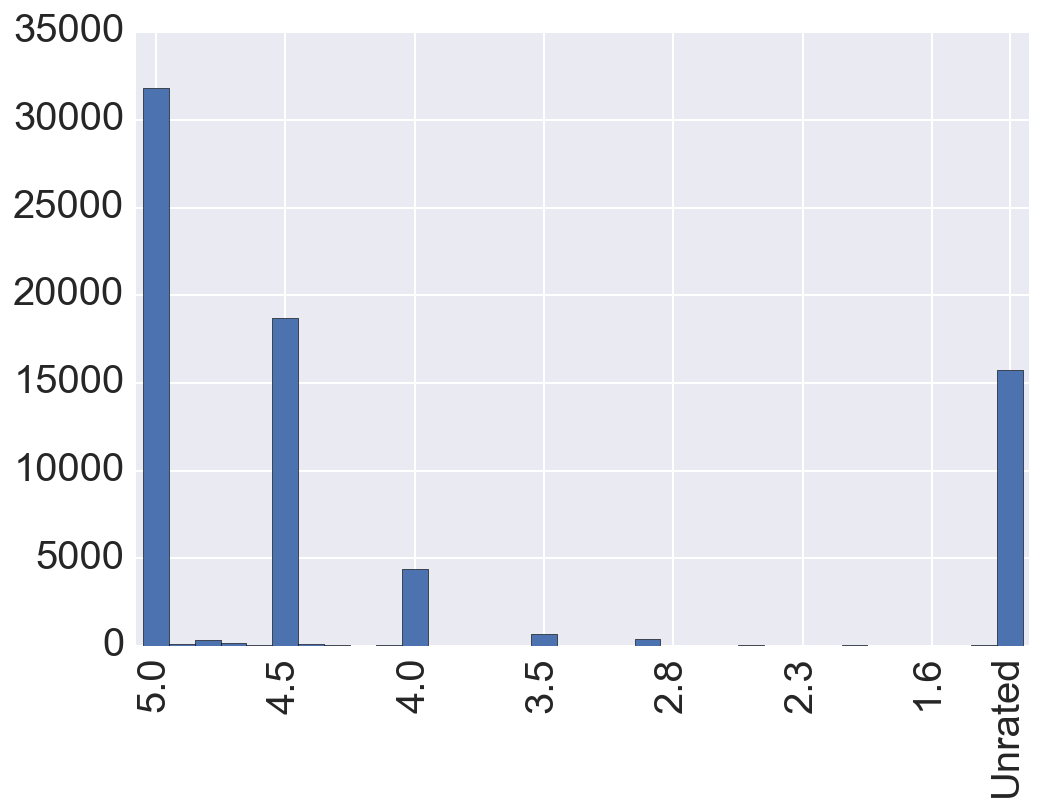

In [54]:
sns.set_context('notebook', font_scale=2)
# fillna -> 0 would work here
rawtable.rating.map(include_unrated).value_counts().rename({'Unrated': np.NaN}).reset_index().sort(
    columns='index', ascending=False, na_position='last').fillna('Unrated').set_index('index').plot(kind='bar',
                                                                                                   width=1.0)
plt.xlabel('')
plt.legend().remove()
locs, labels = plt.xticks()
plt.xticks(list(locs[::5]) + [max(locs)], [label.get_text() for label in labels[::5]] + ['Unrated'])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

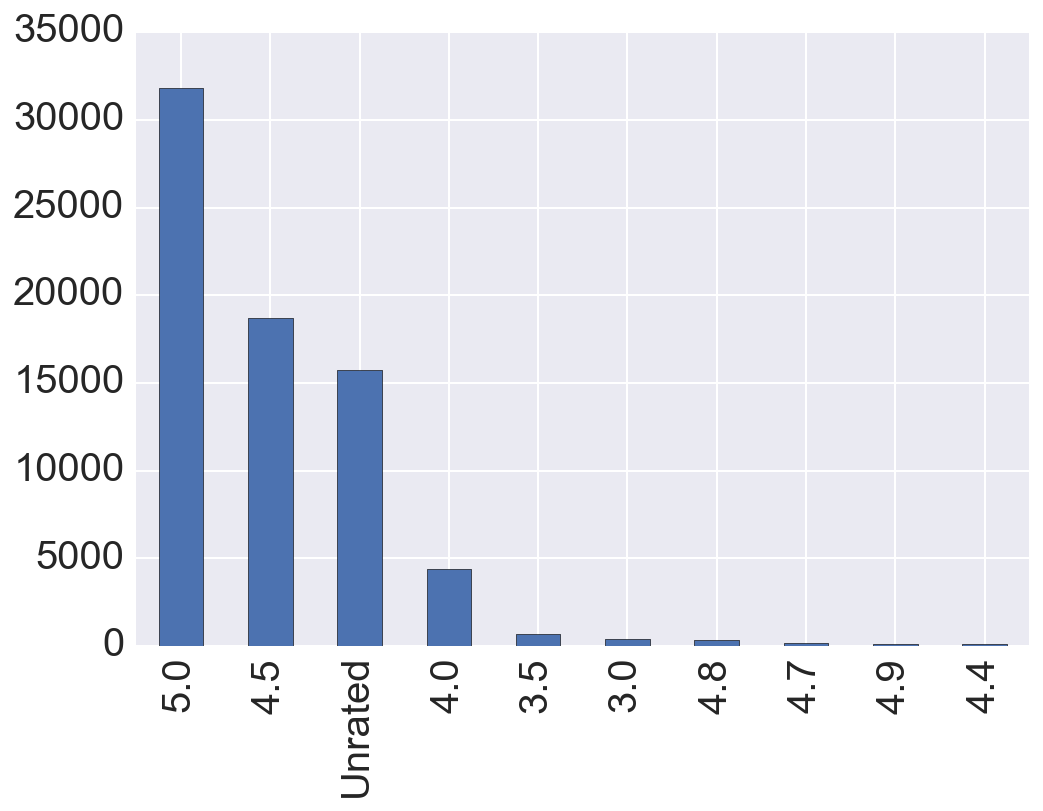

In [89]:
rawtable.rating.map(include_unrated).value_counts()[:10].plot(kind='bar')

In [59]:
rawtable.index[np.logical_not(np.isfinite(rawtable.rating))]

Index(['air1000995', 'air1003184', 'air1004334', 'air1004619', 'air1005006',
       'air1005369', 'air1005715', 'air1008247', 'air1008338', 'air1009178', 
       ...
       'air992353', 'air992594', 'air993044', 'air995025', 'air995169',
       'air99610', 'air998739', 'air998896', 'air999809', 'air999977'],
      dtype='object', name='id', length=15727)